<a href="https://colab.research.google.com/github/SRINIRAGZ/CustomerChurn_Kaggle/blob/main/BankChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#optuna for hyperparameter tuning
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 21.2 MB/s eta 0:00:00


# **Customer Churn Model for Bank**

data link: [churn_dataset](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling/data?select=Churn_Modelling.csv)


In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import optuna
import sklearn as sk

In [8]:
filename = '/Churn_Modelling.csv'

Import Raw Data

In [9]:

df_raw =pd.read_csv(filename)
print(df_raw.dtypes)
print(df_raw.shape)
print(df_raw.head())

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
(10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.8

# Data processing


In [11]:

df = df_raw.drop(['RowNumber','CustomerId','Surname'], axis=1).copy()
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


Display List of values in the data


In [12]:
for c in df.columns:
  print(f'{c}: {df[c].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

Display data metrics

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,10000.0,0.545700,0.497932,0.0,0.000000,1.000000,1.000000,1.0
Tenure,10000.0,5.012800,2.892174,0.0,3.000000,5.000000,7.000000,10.0
Balance,10000.0,0.304848,0.248696,0.0,0.000000,0.387402,0.508749,1.0
HasCrCard,10000.0,0.705500,0.455840,0.0,0.000000,1.000000,1.000000,1.0
IsActiveMember,10000.0,0.515100,0.499797,0.0,0.000000,1.000000,1.000000,1.0
EstimatedSalary,10000.0,0.500441,0.287580,0.0,0.254977,0.500960,0.746955,1.0
Exited,10000.0,0.203700,0.402769,0.0,0.000000,0.000000,0.000000,1.0
France,10000.0,0.501400,0.500023,0.0,0.000000,1.000000,1.000000,1.0
Germany,10000.0,0.250900,0.433553,0.0,0.000000,0.000000,1.000000,1.0
Spain,10000.0,0.247700,0.431698,0.0,0.000000,0.000000,0.000000,1.0


Data Preprocessing step and one hot encoding using pandas


In [13]:
def scorebucket(s: int):
  ll = (s//50)*50
  ul = ll+50-1
  return f'{str(ll)}-{str(ul)}'

def agebucket(a: int):
  ll = (a//10)*10
  ul = ll+10-1
  return f'{str(ll)}-{str(ul)}'


df['CreditScore'] = df['CreditScore'].apply(scorebucket)
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['Age'] = df['Age'].apply(agebucket)
df = pd.get_dummies(df, prefix=['','ProdNum_','CS_','Age_'] , prefix_sep='',columns=['Geography','NumOfProducts','CreditScore','Age'], dtype='int')
df


/tmp/ipython-input-13-2829356711.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female':0,'Male':1})


,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,...,CS_850-899,Age_10-19,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,Age_90-99
0,0,2,0.00,1,1,101348.88,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,83807.86,0,1,112542.58,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,8,159660.80,1,0,113931.57,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0.00,0,0,93826.63,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,125510.82,1,1,79084.10,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5,0.00,1,0,96270.64,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,1,10,57369.61,1,1,101699.77,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9997,0,7,0.00,0,1,42085.58,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9998,1,3,75075.31,1,0,92888.52,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
print(df.dtypes)

Gender               int64
Tenure               int64
Balance            float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               int64
Germany              int64
Spain                int64
ProdNum_1            int64
ProdNum_2            int64
ProdNum_3            int64
ProdNum_4            int64
CS_350-399           int64
CS_400-449           int64
CS_450-499           int64
CS_500-549           int64
CS_550-599           int64
CS_600-649           int64
CS_650-699           int64
CS_700-749           int64
CS_750-799           int64
CS_800-849           int64
CS_850-899           int64
Age_10-19            int64
Age_20-29            int64
Age_30-39            int64
Age_40-49            int64
Age_50-59            int64
Age_60-69            int64
Age_70-79            int64
Age_80-89            int64
Age_90-99            int64
dtype: object


Scaling the float variables

In [16]:
transform_cols = ['Balance','EstimatedSalary']
scaler = sk.preprocessing.MinMaxScaler()
df[transform_cols] = scaler.fit_transform(df[transform_cols])
df

,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,...,CS_850-899,Age_10-19,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,Age_90-99
0,0,2,0.000000,1,1,0.506735,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0.334031,0,1,0.562709,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,8,0.636357,1,0,0.569654,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0.000000,0,0,0.469120,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,0.500246,1,1,0.395400,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5,0.000000,1,0,0.481341,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,1,10,0.228657,1,1,0.508490,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9997,0,7,0.000000,0,1,0.210390,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9998,1,3,0.299226,1,0,0.464429,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Preppring input and target variable sets for the model

In [17]:
X= df.drop('Exited',axis=1)
Y = df['Exited']
print(X,Y)

      Gender  Tenure   Balance  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0       2  0.000000          1               1         0.506735   
1          0       1  0.334031          0               1         0.562709   
2          0       8  0.636357          1               0         0.569654   
3          0       1  0.000000          0               0         0.469120   
4          0       2  0.500246          1               1         0.395400   
...      ...     ...       ...        ...             ...              ...   
9995       1       5  0.000000          1               0         0.481341   
9996       1      10  0.228657          1               1         0.508490   
9997       0       7  0.000000          0               1         0.210390   
9998       1       3  0.299226          1               0         0.464429   
9999       0       4  0.518708          1               0         0.190914   

      France  Germany  Spain  ProdNum_1  ...  CS_850-899  Age_1

TEst Train splits

In [18]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X,Y, test_size=0.2, random_state=41)


In [19]:
print(x_train.shape)
print(x_test.shape)

(8000, 33)
(2000, 33)


Training ANN using keras

Optimizing on hyperparameters number of hidden layers and number of perceptrons using optuna

In [26]:

def create_model(trial, input_dim):

    n_layers = trial.suggest_int("n_layers", 1, 2)
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=(input_dim,)))
    for i in range(n_layers):

        num_units = trial.suggest_int(f"n_units_l{i}", 4, 15, step=1)
        model.add(keras.layers.Dense(num_units, activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))  # binary classification
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def objective(trial):
    kfold = sk.model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores = []


    for t_id, v_id in kfold.split(x_train, y_train):
        x_t, x_v = x_train.iloc[t_id], x_train.iloc[v_id]
        y_t, y_v = y_train.iloc[t_id], y_train.iloc[v_id]

        model = create_model(trial, input_dim=x_train.shape[1])

        model.fit(x_t, y_t,
                  epochs=30,
                  batch_size=32,
                  verbose=0)

        preds = (model.predict(x_v) > 0.5).astype(int)
        acc = sk.metrics.accuracy_score(y_v, preds)
        scores.append(acc)

    return np.mean(scores)

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

# Best result
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_trial.params)

[I 2025-06-27 20:11:38,755] A new study created in memory with name: no-name-4cdb9e01-26a9-4b8f-b47e-9c9b1d1d3e9f
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-06-27 20:12:56,667] Trial 0 finished with value: 0.8500000000000001 and parameters: {'n_layers': 2, 'n_units_l0': 4, 'n_units_l1': 12}. Best is trial 0 with value: 0.8500000000000001.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:14:13,322] Trial 1 finished with value: 0.851875 and parameters: {'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 9}. Best is trial 1 with value: 0.851875.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:15:24,488] Trial 2 finished with value: 0.85125 and parameters: {'n_layers': 1, 'n_units_l0': 12}. Best is trial 1 with value: 0.851875.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:16:41,328] Trial 3 finished with value: 0.851875 and parameters: {'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 15}. Best is trial 1 with value: 0.851875.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-06-27 20:17:49,383] Trial 4 finished with value: 0.852625 and parameters: {'n_layers': 1, 'n_units_l0': 9}. Best is trial 4 with value: 0.852625.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:18:57,178] Trial 5 finished with value: 0.85275 and parameters: {'n_layers': 1, 'n_units_l0': 9}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:20:13,200] Trial 6 finished with value: 0.851375 and parameters: {'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 13}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-06-27 20:21:33,053] Trial 7 finished with value: 0.8518749999999999 and parameters: {'n_layers': 2, 'n_units_l0': 10, 'n_units_l1': 10}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-06-27 20:22:52,725] Trial 8 finished with value: 0.851375 and parameters: {'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 15}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:24:04,183] Trial 9 finished with value: 0.851125 and parameters: {'n_layers': 1, 'n_units_l0': 12}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:25:13,197] Trial 10 finished with value: 0.85225 and parameters: {'n_layers': 1, 'n_units_l0': 15}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:26:23,342] Trial 11 finished with value: 0.8508749999999999 and parameters: {'n_layers': 1, 'n_units_l0': 10}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2025-06-27 20:27:33,861] Trial 12 finished with value: 0.8522500000000001 and parameters: {'n_layers': 1, 'n_units_l0': 9}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-06-27 20:28:44,415] Trial 13 finished with value: 0.8525 and parameters: {'n_layers': 1, 'n_units_l0': 4}. Best is trial 5 with value: 0.85275.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2025-06-27 20:29:56,362] Trial 14 finished with value: 0.8496250000000001 and parameters: {'n_layers': 1, 'n_units_l0': 12}. Best is trial 5 with value: 0.85275.


Best accuracy: 0.85275
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 9}


Training the optimized model


In [28]:
#optimized model
# 1. n=3 #l1=7 #l2=9
def create_best_model(best_params, input_dim):
    # Suggest number of layers
    n_layers = best_params['n_layers']
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=(input_dim,)))
    for i in range(n_layers):
        # Suggest number of units per layer
        num_units = best_params[f'n_units_l{i}']
        model.add(keras.layers.Dense(num_units, activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))  # binary classification
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

opt_model = create_best_model(study.best_trial.params, input_dim=x_train.shape[1])
opt_model.fit(x_train,y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5331 - loss: 0.8539
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4519
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3796
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3756
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.3769
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.3771
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3651
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.3651
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.3665
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3515
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3553
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Prediction on Test data

In [30]:
yp = opt_model.predict(x_test)
yp[yp<0.5] = 0
yp[yp>=0.5] = 1
yp[:10]
print(sk.metrics.classification_report(y_test,yp))
print(sk.metrics.confusion_matrix(y_test, yp))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1597
           1       0.75      0.49      0.59       403

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

[[1532   65]
 [ 206  197]]


GB trees using XG boost

In [40]:
from xgboost import XGBClassifier
import xgboost as xgb

In [37]:
def create_model(trial):
    n_estimators = trial.suggest_int("n_estimators", 20, 200, step=10)
    max_depth = trial.suggest_int("max_depth", 2, 6, step=1)
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=1, objective='binary:logistic')
    return model

def objective(trial):
    kfold = sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []


    for t_id, v_id in kfold.split(x_train, y_train):
        x_t, x_v = x_train.iloc[t_id], x_train.iloc[v_id]
        y_t, y_v = y_train.iloc[t_id], y_train.iloc[v_id]
        model = create_model(trial)
        model.fit(x_t, y_t)
        preds = (model.predict(x_v) > 0.5).astype(int)
        acc = sk.metrics.accuracy_score(y_v, preds)
        scores.append(acc)
    return np.mean(scores)

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Best result
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_trial.params)

[I 2025-06-27 21:13:46,468] A new study created in memory with name: no-name-88266c28-85cf-4ed6-931d-24b86b5784b3
[I 2025-06-27 21:13:48,699] Trial 0 finished with value: 0.8485000000000001 and parameters: {'n_estimators': 200, 'max_depth': 2}. Best is trial 0 with value: 0.8485000000000001.
[I 2025-06-27 21:13:49,717] Trial 1 finished with value: 0.840625 and parameters: {'n_estimators': 30, 'max_depth': 4}. Best is trial 0 with value: 0.8485000000000001.
[I 2025-06-27 21:13:51,373] Trial 2 finished with value: 0.827125 and parameters: {'n_estimators': 50, 'max_depth': 6}. Best is trial 0 with value: 0.8485000000000001.
[I 2025-06-27 21:13:52,466] Trial 3 finished with value: 0.837875 and parameters: {'n_estimators': 40, 'max_depth': 4}. Best is trial 0 with value: 0.8485000000000001.
[I 2025-06-27 21:13:53,911] Trial 4 finished with value: 0.844875 and parameters: {'n_estimators': 90, 'max_depth': 3}. Best is trial 0 with value: 0.8485000000000001.
[I 2025-06-27 21:13:55,561] Trial 5

Best accuracy: 0.858375
Best hyperparameters: {'n_estimators': 20, 'max_depth': 3}


In [38]:
bst_model = XGBClassifier(n_estimators=study.best_trial.params['n_estimators'], max_depth=study.best_trial.params['max_depth'], learning_rate=1, objective='binary:logistic')
# fit model
bst_model.fit(x_train, y_train)
# make predictions
yp_tree = bst_model.predict(x_test)
yp_tree[yp_tree<0.5] = 0
yp_tree[yp_tree>=0.5] = 1
print(sk.metrics.classification_report(y_test,yp_tree))
print(sk.metrics.confusion_matrix(y_test, yp_tree))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1597
           1       0.72      0.51      0.60       403

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

[[1517   80]
 [ 197  206]]


In [39]:
feature_important = bst_model.get_booster().get_score(importance_type='weight')
print(feature_important)

{'Gender': 4.0, 'Tenure': 8.0, 'Balance': 32.0, 'HasCrCard': 3.0, 'IsActiveMember': 7.0, 'EstimatedSalary': 27.0, 'France': 3.0, 'Germany': 10.0, 'Spain': 1.0, 'ProdNum_1': 5.0, 'ProdNum_2': 2.0, 'ProdNum_3': 1.0, 'ProdNum_4': 2.0, 'CS_350-399': 2.0, 'CS_400-449': 1.0, 'CS_450-499': 1.0, 'CS_500-549': 1.0, 'CS_550-599': 1.0, 'CS_600-649': 1.0, 'CS_650-699': 2.0, 'CS_700-749': 1.0, 'Age_20-29': 2.0, 'Age_40-49': 2.0, 'Age_50-59': 5.0, 'Age_60-69': 2.0, 'Age_70-79': 1.0}


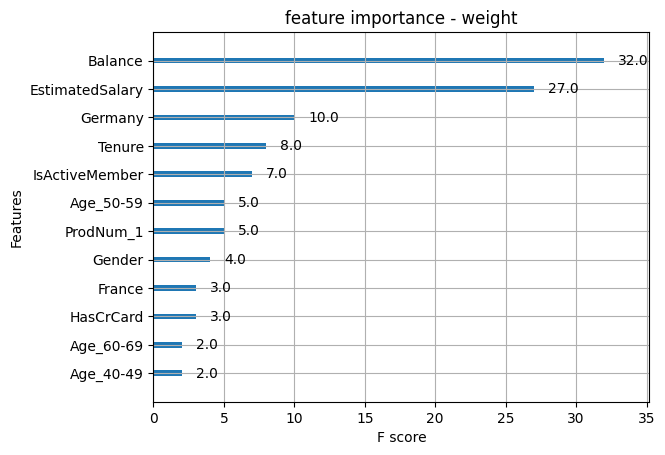

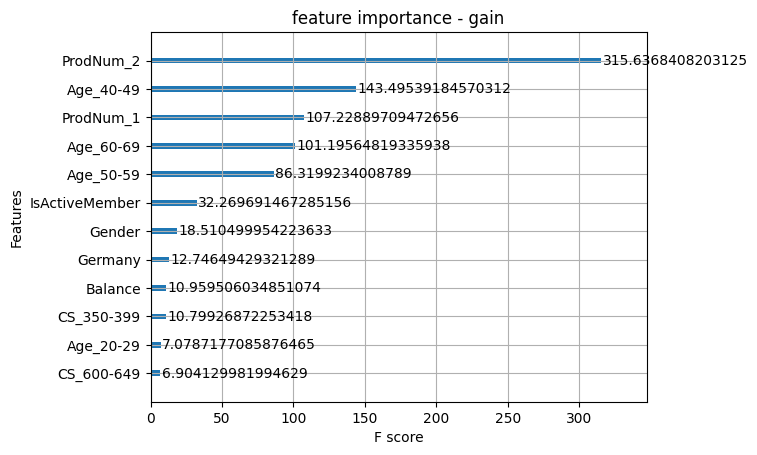

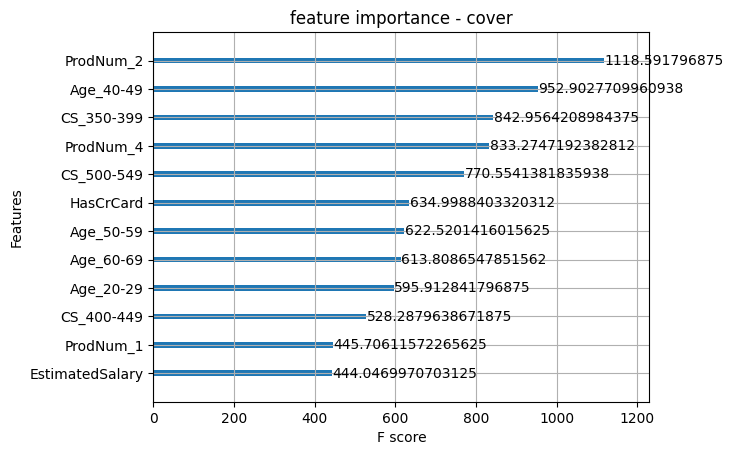

In [43]:
type=['weight','gain','cover']
for t in type:
  xgb.plot_importance(bst_model,importance_type=t, title=f'feature importance - {t}', max_num_features=12)
